Regression:

Features -> Age, Fare, Cabin (deck level), Sex, Class

Then I removed the features one at a time to see what the best combination was

Linear Regression
Final Features -> Class, Sex, Age 

Non-linear Regression
Features -> Age, Fare, Cabin (deck level), Sex, Class


GridSearch to tune parameters

Run test data on best model
1) Linear Regression
2) Polynomial GridSearch

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

file_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'  
df = pd.read_csv(file_path)

df['Age'].fillna(df['Age'].median(), inplace=True)       # Fill missing Age with median
df['Fare'].fillna(df['Fare'].median(), inplace=True)     # Fill missing Fare with median
df['Cabin'].fillna('U', inplace=True)                    # Replace missing cabins with 'U'
# Cabin preprocessing: Extract first letter of cabin number (deck level)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})       # Encode 'Sex' (0 = male, 1 = female)
df['Cabin'] = df['Cabin'].astype('category').cat.codes    # Encode 'Cabin' as numerical codes

features = ['Pclass', 'Sex', 'Age']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l1', 'l2'],                # Regularization type
    'solver': ['liblinear']                 # Required for L1 regularization
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_final, y_train_final)

print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Overall Test Accuracy: {test_accuracy:.4f}")

X_test_combined = pd.concat([X_test, y_test], axis=1)

def evaluate_group_accuracy(model, X_test_combined):
    groups = {
        "Male": X_test_combined['Sex'] == 0,
        "Female": X_test_combined['Sex'] == 1,
        "Class 1": X_test_combined['Pclass'] == 1,
        "Class 2": X_test_combined['Pclass'] == 2,
        "Class 3": X_test_combined['Pclass'] == 3,
        "Class 1 Male": (X_test_combined['Pclass'] == 1) & (X_test_combined['Sex'] == 0),
        "Class 1 Female": (X_test_combined['Pclass'] == 1) & (X_test_combined['Sex'] == 1),
        "Class 2 Male": (X_test_combined['Pclass'] == 2) & (X_test_combined['Sex'] == 0),
        "Class 2 Female": (X_test_combined['Pclass'] == 2) & (X_test_combined['Sex'] == 1),
        "Class 3 Male": (X_test_combined['Pclass'] == 3) & (X_test_combined['Sex'] == 0),
        "Class 3 Female": (X_test_combined['Pclass'] == 3) & (X_test_combined['Sex'] == 1),
    }
    
    print("\nGroup-Specific Accuracy:")
    for group_name, condition in groups.items():
        X_group = X_test_combined[condition][features]
        y_group = X_test_combined[condition]['Survived']
        if len(y_group) == 0:  # Skip empty groups
            print(f"{group_name}: No data points.")
            continue
        y_pred_group = model.predict(X_group)
        group_accuracy = accuracy_score(y_group, y_pred_group)
        print(f"Accuracy for {group_name}: {group_accuracy:.4f}")

evaluate_group_accuracy(best_model, X_test_combined)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Accuracy: 0.7902
Overall Test Accuracy: 0.7821

Group-Specific Accuracy:
Accuracy for Male: 0.7966
Accuracy for Female: 0.7541
Accuracy for Class 1: 0.7333
Accuracy for Class 2: 0.8824
Accuracy for Class 3: 0.7700
Accuracy for Class 1 Male: 0.6333
Accuracy for Class 1 Female: 0.9333
Accuracy for Class 2 Male: 0.8125
Accuracy for Class 2 Female: 0.9444
Accuracy for Class 3 Male: 0.8611
Accuracy for Class 3 Female: 0.5357


/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_29527/2299579204.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)       # Fill missing Age with median
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_29527/2299579204.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

Polynomial Regression

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

file_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna('U', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Cabin'] = df['Cabin'].astype('category').cat.codes

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

poly = PolynomialFeatures(degree=2, include_bias=False) 
X_train_poly = poly.fit_transform(X_train_final)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=2000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_poly, y_train_final)

print("Best Hyperparameters for Polynomial Logistic Regression:", grid_search.best_params_)
best_model_poly = grid_search.best_estimator_

y_val_pred = best_model_poly.predict(X_val_poly)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (Non-Linear Regression): {val_accuracy:.4f}")

X_val_combined = pd.DataFrame(X_val, columns=features)
X_val_combined['Survived'] = y_val

def evaluate_group_accuracy(model, X_combined, poly):
    groups = {
        "Male": X_combined['Sex'] == 0,
        "Female": X_combined['Sex'] == 1,
        "Class 1": X_combined['Pclass'] == 1,
        "Class 2": X_combined['Pclass'] == 2,
        "Class 3": X_combined['Pclass'] == 3,
        "Class 1 Male": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 0),
        "Class 1 Female": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 1),
        "Class 2 Male": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 0),
        "Class 2 Female": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 1),
        "Class 3 Male": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 0),
        "Class 3 Female": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 1),
    }
    
    print("\nGroup-Specific Accuracy (Validation Data):")
    for group_name, condition in groups.items():
        X_group = X_combined[condition][features]
        y_group = X_combined[condition]['Survived']
        
        if len(y_group) == 0:  # Skip empty groups
            print(f"{group_name}: No data points.")
            continue
        
        X_group_poly = poly.transform(X_group)
        
        y_pred_group = model.predict(X_group_poly)
        
        group_accuracy = accuracy_score(y_group, y_pred_group)
        print(f"Accuracy for {group_name}: {group_accuracy:.4f}")

evaluate_group_accuracy(best_model_poly, X_val_combined, poly)


y_test_pred = best_model_poly.predict(X_test_poly)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy (Non-Linear Regression): {test_accuracy:.4f}")

/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_29527/663538436.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_29527/663538436.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

Best Hyperparameters for Polynomial Logistic Regression: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Accuracy (Non-Linear Regression): 0.8112

Group-Specific Accuracy (Validation Data):
Accuracy for Male: 0.8043
Accuracy for Female: 0.8235
Accuracy for Class 1: 0.7647
Accuracy for Class 2: 0.9000
Accuracy for Class 3: 0.7975
Accuracy for Class 1 Male: 0.5882
Accuracy for Class 1 Female: 0.9412
Accuracy for Class 2 Male: 0.8750
Accuracy for Class 2 Female: 0.9286
Accuracy for Class 3 Male: 0.8475
Accuracy for Class 3 Female: 0.6500
Test Accuracy (Non-Linear Regression): 0.7989


With interaction feature

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

df['Sex_Pclass'] = df['Pclass'] * (df['Sex'].replace({0: -1, 1: 1}))

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Sex_Pclass']
X = df[features]
y = df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_resampled)
X_val_poly = poly.transform(X_val)

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search = GridSearchCV(LogisticRegression(max_iter=2000, class_weight='balanced'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_poly, y_train_resampled)

best_model_poly = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

y_val_pred = best_model_poly.predict(X_val_poly)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (Non-Linear Regression): {val_accuracy:.4f}")

X_val_combined = pd.DataFrame(X_val, columns=features)
X_val_combined['Survived'] = y_val

def evaluate_group_accuracy(model, X_combined, poly):
    groups = {
        "Male": X_combined['Sex'] == 0,
        "Female": X_combined['Sex'] == 1,
        "Class 1": X_combined['Pclass'] == 1,
        "Class 2": X_combined['Pclass'] == 2,
        "Class 3": X_combined['Pclass'] == 3,
        "Class 1 Male": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 0),
        "Class 1 Female": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 1),
        "Class 2 Male": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 0),
        "Class 2 Female": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 1),
        "Class 3 Male": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 0),
        "Class 3 Female": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 1),
    }
    
    print("\nGroup-Specific Accuracy (Validation Data):")
    for group_name, condition in groups.items():
        X_group = X_combined[condition][features]
        y_group = X_combined[condition]['Survived']
        
        if len(y_group) == 0:
            print(f"{group_name}: No data points.")
            continue
        
        X_group_poly = poly.transform(X_group)
        
        y_pred_group = model.predict(X_group_poly)
        
        group_accuracy = accuracy_score(y_group, y_pred_group)
        print(f"Accuracy for {group_name}: {group_accuracy:.4f}")

evaluate_group_accuracy(best_model_poly, X_val_combined, poly)


Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Validation Accuracy (Non-Linear Regression): 0.7765

Group-Specific Accuracy (Validation Data):
Accuracy for Male: 0.7627
Accuracy for Female: 0.8033
Accuracy for Class 1: 0.6889
Accuracy for Class 2: 0.8824
Accuracy for Class 3: 0.7800
Accuracy for Class 1 Male: 0.5667
Accuracy for Class 1 Female: 0.9333
Accuracy for Class 2 Male: 0.8125
Accuracy for Class 2 Female: 0.9444
Accuracy for Class 3 Male: 0.8333
Accuracy for Class 3 Female: 0.6429


SVM:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

file_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna('U', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Cabin'] = df['Cabin'].astype('category').cat.codes
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Jonkheer'], 'Other')
df['Title'] = df['Title'].astype('category').cat.codes
df['Sex_Pclass'] = df['Pclass'] * (df['Sex'].replace({0: -1, 1: 1}))

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Sex_Pclass', 'Title', 'FamilySize']

X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train_final)

scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)

param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf'], 
    'gamma': ['scale', 0.1, 1]
}


svm = SVC()
random_search = RandomizedSearchCV(
    SVC(), param_distributions=param_grid, n_iter=20, cv=5, scoring='accuracy', verbose=1, random_state=42
)
random_search.fit(X_train_resampled_scaled, y_train_resampled)

best_svm = random_search.best_estimator_
print("Best Hyperparameters for SVM:", random_search.best_params_)

y_val_pred = best_svm.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (SVM): {val_accuracy:.4f}")

X_val_combined = pd.DataFrame(X_val, columns=features)
X_val_combined['Survived'] = y_val

def evaluate_group_accuracy(model, X_combined, scaler):
    groups = {
        "Male": X_combined['Sex'] == 0,
        "Female": X_combined['Sex'] == 1,
        "Class 1": X_combined['Pclass'] == 1,
        "Class 2": X_combined['Pclass'] == 2,
        "Class 3": X_combined['Pclass'] == 3,
        "Class 1 Male": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 0),
        "Class 1 Female": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 1),
        "Class 2 Male": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 0),
        "Class 2 Female": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 1),
        "Class 3 Male": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 0),
        "Class 3 Female": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 1),
    }
    
    print("\nGroup-Specific Accuracy:")
    for group_name, condition in groups.items():
        X_group = X_combined[condition][features]
        y_group = X_combined[condition]['Survived']
        
        if len(y_group) == 0: 
            print(f"{group_name}: No data points.")
            continue
        
        X_group_scaled = scaler.transform(X_group)
        
        y_pred_group = model.predict(X_group_scaled)
        
        group_accuracy = accuracy_score(y_group, y_pred_group)
        print(f"Accuracy for {group_name}: {group_accuracy:.4f}")

evaluate_group_accuracy(best_svm, X_val_combined, scaler)


# RUN THIS MODEL ON THE TEST DATA TO SEE HOW IT PERFORMS
X_test_scaled = scaler.transform(X_test)

y_test_pred = best_svm.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy (SVM): {test_accuracy:.4f}")

X_test_combined = pd.DataFrame(X_test, columns=features)
X_test_combined['Survived'] = y_test

print("\nTest Accuracy Results:")
evaluate_group_accuracy(best_svm, X_test_combined, scaler)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_29527/88458814.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_29527/88458814.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

Best Hyperparameters for SVM: {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
Validation Accuracy (SVM): 0.8322

Group-Specific Accuracy:
Accuracy for Male: 0.8370
Accuracy for Female: 0.8235
Accuracy for Class 1: 0.7941
Accuracy for Class 2: 0.9333
Accuracy for Class 3: 0.8101
Accuracy for Class 1 Male: 0.6471
Accuracy for Class 1 Female: 0.9412
Accuracy for Class 2 Male: 0.9375
Accuracy for Class 2 Female: 0.9286
Accuracy for Class 3 Male: 0.8644
Accuracy for Class 3 Female: 0.6500
Test Accuracy (SVM): 0.8045

Test Accuracy Results:

Group-Specific Accuracy:
Accuracy for Male: 0.7966
Accuracy for Female: 0.8197
Accuracy for Class 1: 0.6000
Accuracy for Class 2: 0.9118
Accuracy for Class 3: 0.8600
Accuracy for Class 1 Male: 0.4667
Accuracy for Class 1 Female: 0.8667
Accuracy for Class 2 Male: 0.8750
Accuracy for Class 2 Female: 0.9444
Accuracy for Class 3 Male: 0.9167
Accuracy for Class 3 Female: 0.7143


CLUSTERING


Clustering Results for k=2:
Confusion Matrix:
                Predicted 0  Predicted 1
Ground Truth 0           91           19
Ground Truth 1           45           24
Accuracy: 0.6425

Clustering Results for k=3:
Confusion Matrix:
                Predicted 0  Predicted 1
Ground Truth 0           77           33
Ground Truth 1           15           54
Accuracy: 0.7318

Clustering Results for k=4:
Confusion Matrix:
                Predicted 0  Predicted 1
Ground Truth 0           81           29
Ground Truth 1           15           54
Accuracy: 0.7542

Clustering Results for k=2:
Confusion Matrix:
                Predicted 0  Predicted 1
Ground Truth 0           91           19
Ground Truth 1           45           24
Accuracy: 0.6425


/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_29527/1531219301.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_29527/1531219301.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

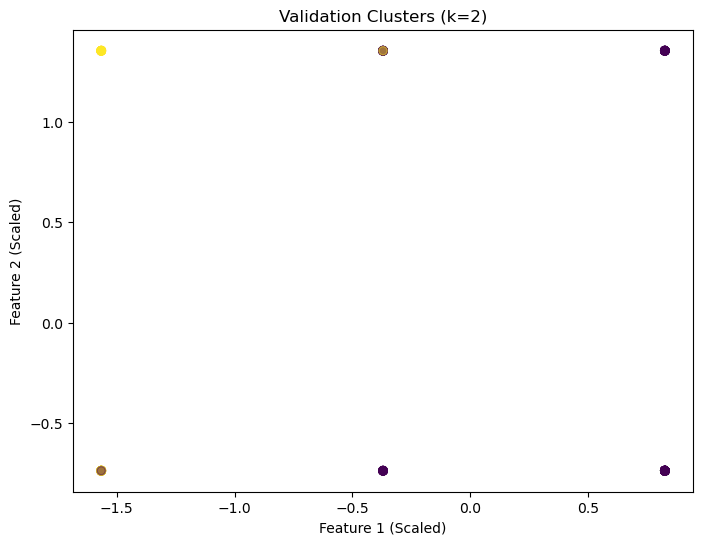

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

file_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna('U', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Cabin'] = df['Cabin'].astype('category').cat.codes
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Jonkheer'], 'Other')
df['Title'] = df['Title'].astype('category').cat.codes
df['Sex_Pclass'] = df['Pclass'] * (df['Sex'].replace({0: -1, 1: 1}))

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'FamilySize', 'Sex_Pclass']
X = df[features]
y = df['Survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

def evaluate_clustering(k, X, y_true):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    cm = confusion_matrix(y_true, cluster_labels)
    cluster_to_class = {}
    
    unique_classes = [f"Ground Truth {cls}" for cls in np.unique(y_true)]
    
    for cluster in range(k):
        most_common_class = np.argmax(cm[:, cluster])
        cluster_to_class[cluster] = most_common_class
    
    y_pred = [cluster_to_class[label] for label in cluster_labels]
    
    cm_remapped = confusion_matrix(y_true, y_pred)
    
    acc = accuracy_score(y_true, y_pred)
    
    print(f"\nClustering Results for k={k}:")
    print("Confusion Matrix:")
    print(pd.DataFrame(cm_remapped, index=unique_classes, columns=["Predicted 0", "Predicted 1"]))
    print(f"Accuracy: {acc:.4f}")
    
    return kmeans, y_pred

for k in [2, 3, 4]:
    evaluate_clustering(k, X_val, y_val)

def visualize_clusters(X, y_pred, title="K-Means Clusters"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.xlabel("Feature 1 (Scaled)")
    plt.ylabel("Feature 2 (Scaled)")
    plt.show()

kmeans_model, y_pred = evaluate_clustering(2, X_val, y_val)
visualize_clusters(X_val, kmeans_model.labels_, title="Validation Clusters (k=2)")


Continue with K=4

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

file_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna('U', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Cabin'] = df['Cabin'].astype('category').cat.codes
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Jonkheer'], 'Other')
df['Title'] = df['Title'].astype('category').cat.codes
df['Sex_Pclass'] = df['Pclass'] * (df['Sex'].replace({0: -1, 1: 1}))

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'FamilySize', 'Sex_Pclass']
X = df[features]
y = df['Survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

def evaluate_clustering(k, X, y_true):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    cm = confusion_matrix(y_true, cluster_labels)
    cluster_to_class = {}
    for cluster in range(k):
        most_common_class = np.argmax(cm[:, cluster])
        cluster_to_class[cluster] = most_common_class
    
    y_pred = [cluster_to_class[label] for label in cluster_labels]
    acc = accuracy_score(y_true, y_pred)
    print(f"\nClustering Results for k={k}: Accuracy = {acc:.4f}")
    
    return kmeans, y_pred

def group_based_accuracy(X_combined, y_true, y_pred, original_X):
    X_combined = X_combined.reset_index(drop=True)
    y_true = y_true.reset_index(drop=True)
    original_X = original_X.reset_index(drop=True)
    
    X_combined['Pclass'] = original_X['Pclass']
    X_combined['Sex'] = original_X['Sex']
    X_combined['Survived'] = y_true
    X_combined['Predicted'] = y_pred
    
    groups = {
        "Male": X_combined['Sex'] == 0,
        "Female": X_combined['Sex'] == 1,
        "Class 1": X_combined['Pclass'] == 1,
        "Class 2": X_combined['Pclass'] == 2,
        "Class 3": X_combined['Pclass'] == 3,
        "Class 1 Male": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 0),
        "Class 1 Female": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 1),
        "Class 2 Male": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 0),
        "Class 2 Female": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 1),
        "Class 3 Male": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 0),
        "Class 3 Female": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 1),
    }
    
    print("\nGroup-Specific Accuracies:")
    for group_name, condition in groups.items():
        group_data = X_combined[condition]
        if len(group_data) == 0:
            print(f"{group_name}: No data points.")
            continue
        accuracy = accuracy_score(group_data['Survived'], group_data['Predicted'])
        print(f"{group_name}: {accuracy:.4f}")

k = 4
kmeans_model = KMeans(n_clusters=k, random_state=42)
kmeans_model.fit(X_train)

print("\nValidation Data Results:")
kmeans_model, y_val_pred = evaluate_clustering(k, X_val, y_val)
X_val_combined = pd.DataFrame(X_val, columns=features)
original_X_val = pd.DataFrame(X, columns=features).iloc[y_val.index].reset_index(drop=True)
group_based_accuracy(X_val_combined, y_val, y_val_pred, original_X_val)

print("\nTest Data Results:")
def evaluate_on_test_data(kmeans, X_test, y_test, original_X_test):
    cluster_labels = kmeans.predict(X_test)
    cm = confusion_matrix(y_test, cluster_labels)
    cluster_to_class = {}
    for cluster in range(kmeans.n_clusters):
        most_common_class = np.argmax(cm[:, cluster])
        cluster_to_class[cluster] = most_common_class
    
    y_test_pred = [cluster_to_class[label] for label in cluster_labels]
    acc = accuracy_score(y_test, y_test_pred)
    print(f"\nTest Data Accuracy for K={kmeans.n_clusters}: {acc:.4f}")
    
    X_test_combined = pd.DataFrame(X_test, columns=features)
    group_based_accuracy(X_test_combined, y_test, y_test_pred, original_X_test)

original_X_test = pd.DataFrame(X, columns=features).iloc[y_test.index].reset_index(drop=True)
evaluate_on_test_data(kmeans_model, X_test, y_test, original_X_test)



Validation Data Results:

Clustering Results for k=4: Accuracy = 0.6643

Group-Specific Accuracies:
Male: 0.7500
Female: 0.5098
Class 1: 0.5882
Class 2: 0.3667
Class 3: 0.8101
Class 1 Male: 0.3529
Class 1 Female: 0.8235
Class 2 Male: 0.6250
Class 2 Female: 0.0714
Class 3 Male: 0.8983
Class 3 Female: 0.5500

Test Data Results:

Test Data Accuracy for K=4: 0.6257

Group-Specific Accuracies:
Male: 0.7881
Female: 0.3115
Class 1: 0.4889
Class 2: 0.4118
Class 3: 0.7600
Class 1 Male: 0.6000
Class 1 Female: 0.2667
Class 2 Male: 0.8125
Class 2 Female: 0.0556
Class 3 Male: 0.8611
Class 3 Female: 0.5000


/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_29527/3261104477.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_29527/3261104477.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

RANDOM FOREST
- ensemble machine learning algo used for classification and regression tasks. It is build on the concept of Decision Trees but instead of using a single tree, it combines mutiple trees to make more accurate predictions.
- At each split in a tree a random subset of features is used. 
- Non-parametric, does not assume specific relationship between input features and output labels.
-

- The dataset is split into multiple bootstrap samples
- Each decision tree is grown independently using its bootstrap sample, and at each node split a random subset of features is considered
- For classification, trees vote for the class and the majority class is chosen.
- The outputs from all trees are aggregated for the final prediction.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd
import numpy as np

file_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna('U', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Cabin'] = df['Cabin'].astype('category').cat.codes
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Jonkheer'], 'Other')
df['Title'] = df['Title'].astype('category').cat.codes
df['Sex_Pclass'] = df['Pclass'] * (df['Sex'].replace({0: -1, 1: 1}))

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'FamilySize', 'Sex_Pclass']
X = df[features]
y = df['Survived']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

y_val_pred = best_rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (Random Forest): {val_accuracy:.4f}")

def group_based_accuracy(X_combined, y_true, y_pred):
    X_combined = X_combined.copy()
    X_combined['Survived'] = y_true
    X_combined['Predicted'] = y_pred
    
    groups = {
        "Male": X_combined['Sex'] == 0,
        "Female": X_combined['Sex'] == 1,
        "Class 1 Male": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 0),
        "Class 1 Female": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 1),
        "Class 2 Male": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 0),
        "Class 2 Female": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 1),
        "Class 3 Male": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 0),
        "Class 3 Female": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 1),
    }

    print("\nGroup-Specific Accuracies:")
    for group_name, condition in groups.items():
        group_data = X_combined[condition]
        accuracy = accuracy_score(group_data['Survived'], group_data['Predicted'])
        print(f"{group_name}: {accuracy:.4f}")

X_val_combined = pd.DataFrame(X_val, columns=features)
group_based_accuracy(X_val_combined, y_val, y_val_pred)

# y_test_pred = best_rf.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"\nTest Accuracy (Random Forest): {test_accuracy:.4f}")

# X_test_combined = pd.DataFrame(X_test, columns=features)
# group_based_accuracy(X_test_combined, y_test, y_test_pred)


/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_29527/2308498178.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_29527/2308498178.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Validation Accuracy (Random Forest): 0.8112

Group-Specific Accuracies:
Male: 0.8043
Female: 0.8235
Class 1 Male: 0.5294
Class 1 Female: 0.9412
Class 2 Male: 0.9375
Class 2 Female: 0.9286
Class 3 Male: 0.8475
Class 3 Female: 0.6500


In [ ]:
# BINNING OF FARE AND AGES
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


data_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'
df = pd.read_csv(data_path)

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna('U', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Cabin'] = df['Cabin'].astype('category').cat.codes
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Jonkheer'], 'Other')
df['Title'] = df['Title'].astype('category').cat.codes
df['Sex_Pclass'] = df['Sex'] * df['Pclass']


df['AgeBin'] = pd.cut(df['Age'], bins=[0, 10, 20, 40, 60], labels=False)
df['FareBin'] = pd.qcut(df['Fare'], q=4, labels=False)

features = ['Pclass', 'Sex', 'Cabin', 'FamilySize', 'AgeBin', 'FareBin']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

scaler = StandardScaler()
X_train_final_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [5, 10],
    'max_features': ['sqrt']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_final_scaled, y_train_final)

best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

y_val_pred = best_rf.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

X_val_unscaled = X_val.copy()
X_val_unscaled = X_val_unscaled.reset_index(drop=True)  
y_val = y_val.reset_index(drop=True)  
y_val_pred = pd.Series(y_val_pred).reset_index(drop=True)

X_val_unscaled['Survived'] = y_val
X_val_unscaled['Predicted'] = y_val_pred

def group_based_accuracy(X_combined):
    groups = {
        "Male": X_combined['Sex'] == 0,
        "Female": X_combined['Sex'] == 1,
        "Class 1": X_combined['Pclass'] == 1,
        "Class 2": X_combined['Pclass'] == 2,
        "Class 3": X_combined['Pclass'] == 3,
        "Class 1 Male": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 0),
        "Class 1 Female": (X_combined['Pclass'] == 1) & (X_combined['Sex'] == 1),
        "Class 2 Male": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 0),
        "Class 2 Female": (X_combined['Pclass'] == 2) & (X_combined['Sex'] == 1),
        "Class 3 Male": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 0),
        "Class 3 Female": (X_combined['Pclass'] == 3) & (X_combined['Sex'] == 1),
    }
    
    print("\nGroup-Specific Accuracies:")
    for group_name, condition in groups.items():
        group_data = X_combined[condition]
        if len(group_data) == 0:
            print(f"{group_name}: No data points.")
            continue
        accuracy = accuracy_score(group_data['Survived'], group_data['Predicted'])
        print(f"{group_name}: {accuracy:.4f}")

group_based_accuracy(X_val_unscaled)

X_test_scaled = scaler.transform(X_test)

y_test_pred = best_rf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

X_test_unscaled = X_test.copy().reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_test_pred = pd.Series(y_test_pred).reset_index(drop=True)

X_test_unscaled['Survived'] = y_test
X_test_unscaled['Predicted'] = y_test_pred

print("\nGroup-Specific Accuracies on Test Data:")
group_based_accuracy(X_test_unscaled)



/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_29527/3878874039.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_29527/3878874039.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}
Validation Accuracy: 0.8182

Group-Specific Accuracies:
Male: 0.8152
Female: 0.8235
Class 1: 0.7647
Class 2: 0.9333
Class 3: 0.7975
Class 1 Male: 0.5882
Class 1 Female: 0.9412
Class 2 Male: 0.9375
Class 2 Female: 0.9286
Class 3 Male: 0.8475
Class 3 Female: 0.6500

Test Accuracy: 0.7933

Group-Specific Accuracies on Test Data:

Group-Specific Accuracies:
Male: 0.7966
Female: 0.7869
Class 1: 0.6444
Class 2: 0.9118
Class 3: 0.8200
Class 1 Male: 0.5000
Class 1 Female: 0.9333
Class 2 Male: 0.8750
Class 2 Female: 0.9444
Class 3 Male: 0.9028
Class 3 Female: 0.6071


In [ ]:
# OPTIMIZED BINNING

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import itertools

data_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'
df = pd.read_csv(data_path)

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna('U', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Cabin'] = df['Cabin'].astype('category').cat.codes
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Jonkheer'], 'Other')
df['Title'] = df['Title'].astype('category').cat.codes
df['Sex_Pclass'] = df['Sex'] * df['Pclass']

base_features = ['Pclass', 'Sex', 'Cabin', 'FamilySize', 'Sex_Pclass']
y = df['Survived']

def evaluate_binning(age_bins, fare_bins):
    df['AgeBin'] = pd.cut(df['Age'], bins=age_bins, labels=False)
    df['FareBin'] = pd.cut(df['Fare'], bins=fare_bins, labels=False)
    
    features = base_features + ['AgeBin', 'FareBin']
    X = df[features]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
    rf.fit(X_train_scaled, y_train)
    
    y_pred = rf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

age_bin_edges = [
    [0, 10, 20, 30, 40, 50, 60, 70, 80],
    [0, 15, 30, 45, 60, 75, 90],
    np.linspace(0, df['Age'].max(), 5).tolist(),
    np.linspace(0, df['Age'].max(), 10).tolist()
]

fare_bin_edges = [
    [0, 10, 20, 30, 50, 100, 200, 300, 600],
    np.linspace(0, df['Fare'].max(), 5).tolist(),
    np.linspace(0, df['Fare'].max(), 10).tolist()
]

best_accuracy = 0
best_bins = None

print("Testing different bin edges for Age and Fare...\n")
for age_bins, fare_bins in itertools.product(age_bin_edges, fare_bin_edges):
    accuracy = evaluate_binning(age_bins, fare_bins)
    print(f"Age bins: {age_bins}, Fare bins: {fare_bins} -> Accuracy: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_bins = (age_bins, fare_bins)

print("\nBest Binning Strategy:")
print(f"Age bins: {best_bins[0]}")
print(f"Fare bins: {best_bins[1]}")
print(f"Best Accuracy: {best_accuracy:.4f}")


Testing different bin edges for Age and Fare...

Age bins: [0, 10, 20, 30, 40, 50, 60, 70, 80], Fare bins: [0, 10, 20, 30, 50, 100, 200, 300, 600] -> Accuracy: 0.7877
Age bins: [0, 10, 20, 30, 40, 50, 60, 70, 80], Fare bins: [0.0, 128.0823, 256.1646, 384.2469, 512.3292] -> Accuracy: 0.7933
Age bins: [0, 10, 20, 30, 40, 50, 60, 70, 80], Fare bins: [0.0, 56.925466666666665, 113.85093333333333, 170.7764, 227.70186666666666, 284.62733333333335, 341.5528, 398.4782666666666, 455.4037333333333, 512.3292] -> Accuracy: 0.7821


/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_29527/1396590131.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_29527/1396590131.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

Age bins: [0, 15, 30, 45, 60, 75, 90], Fare bins: [0, 10, 20, 30, 50, 100, 200, 300, 600] -> Accuracy: 0.7877
Age bins: [0, 15, 30, 45, 60, 75, 90], Fare bins: [0.0, 128.0823, 256.1646, 384.2469, 512.3292] -> Accuracy: 0.8101
Age bins: [0, 15, 30, 45, 60, 75, 90], Fare bins: [0.0, 56.925466666666665, 113.85093333333333, 170.7764, 227.70186666666666, 284.62733333333335, 341.5528, 398.4782666666666, 455.4037333333333, 512.3292] -> Accuracy: 0.7877
Age bins: [0.0, 20.0, 40.0, 60.0, 80.0], Fare bins: [0, 10, 20, 30, 50, 100, 200, 300, 600] -> Accuracy: 0.7654
Age bins: [0.0, 20.0, 40.0, 60.0, 80.0], Fare bins: [0.0, 128.0823, 256.1646, 384.2469, 512.3292] -> Accuracy: 0.7765
Age bins: [0.0, 20.0, 40.0, 60.0, 80.0], Fare bins: [0.0, 56.925466666666665, 113.85093333333333, 170.7764, 227.70186666666666, 284.62733333333335, 341.5528, 398.4782666666666, 455.4037333333333, 512.3292] -> Accuracy: 0.7765
Age bins: [0.0, 8.88888888888889, 17.77777777777778, 26.666666666666668, 35.55555555555556, 44